<a href="https://colab.research.google.com/github/paarmitap/Mathematical-Modelling-of-Covid-19-Pandemic/blob/main/CovidProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHY 312 -** Numerical Methods and Programming 

# **Project :** Epidemic Modelling 

*Group Members :* 

1.   Ananya Garg (17031)
2.   Muskan Saha (17152)
3.   Paarmita Pandey (17174)
4.   Saniya Shinde (17241)
5.   Siddhi Mukta (17276)




# SIR Model :

REPRODUCTION NO. OF THE DISEASE IS= 4.999972000167999


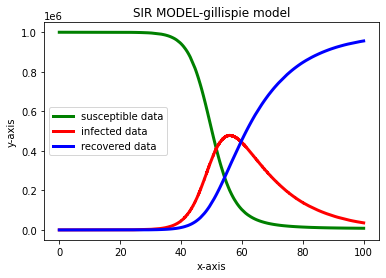

In [ ]:
# SIR MODEL
# GILLISPIE ALGORITHM,ALPHA=5/14 & BETA=1/14
import math                                           
import random
%matplotlib inline
import matplotlib.pyplot as plt

# Input parameters ####################

# int; total population
N = 1000000

# float; maximum elapsed time
T = 100.0

# float; start time
t = 0.0

# float; rate of infection after contact
_alpha = 0.357143
# float; rate of cure
_beta =  0.071429
print("REPRODUCTION NO. OF THE DISEASE IS=",_alpha/_beta)

# int; initial infected population
n_I = 1

#########################################

# Compute susceptible population, set recovered to zero
n_S = N - n_I
n_R = 0

# Initialize results list
susceptible = []
time = []
infected=[]
recovered=[]
susceptible.append((n_S))
infected.append((n_I))
recovered.append((n_R))
time.append((t))
# Main loop
while t < T:
    if n_I == 0:
        break

    w1 =_alpha * n_S * n_I / N
    w2 = _beta * n_I
    W = w1 + w2

    dt = -math.log(random.uniform(0.0, 1.0)) / W
    t = t + dt

    if random.uniform(0.0, 1.0) < w1 / W:
        n_S = n_S - 1
        n_I = n_I + 1
    else:
        n_I = n_I - 1
        n_R = n_R + 1
    susceptible.append((n_S))
    infected.append((n_I))
    recovered.append((n_R))  
    time.append((t))
#print(time)
plt.plot(time,susceptible,label='susceptible data',color='green',linewidth=3)
plt.plot(time,infected,label='infected data',color='red',linewidth=3)
plt.plot(time,recovered,label='recovered data',color='blue',linewidth=3)
plt.legend(loc='best')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('SIR MODEL-gillispie model')
plt.show()

# **SIRD** **Model** :

The reproduction no. is= 5.0
NO.of days taken for recovery is= 14
THE COEFFICIENTS are:beta= 0.3678571428571428 , gamma 0.07142857142857142 , mu 0.0021428571428571425


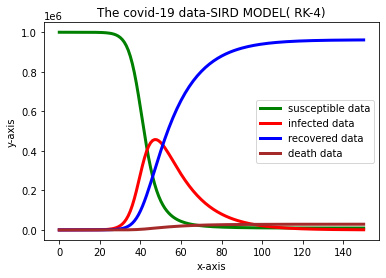

In [ ]:
#SIRD MODEL
#VIA RK-4 
import numpy as np
import scipy as sp
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
R0=5.00
print("The reproduction no. is=",R0)
D=14
print("NO.of days taken for recovery is=",D)
N=1000000
gamma=1/D
mu=(3*gamma)/100
beta=(gamma+mu)*R0
print("THE COEFFICIENTS are:beta=",beta,", gamma",gamma,", mu",mu)
susceptible = []
time = []
infected=[]
recovered=[]
deaths=[]
y=[0,999999,1,0,0]
susceptible.append((y[1]))
infected.append((y[2]))
recovered.append((y[3]))
deaths.append((y[4]))
time.append((y[0]))
der=np.zeros(5)
def derivative(y1):
    der[0]=1
    der[1]=-(beta*y1[2]*y1[1])/N
    der[2]=((beta*y1[2]*y1[1])/N)-((gamma+mu)*y1[2])
    der[3]=gamma*y1[2]
    der[4]=mu*y1[2]
    return der
h=1
T=150
while(y[0]<T):
    y_temp=y
    k1=derivative(y_temp)
    k2=derivative(y_temp+(h/2)*k1)
    k3=derivative(y_temp+(h*k2)/2)
    k4=derivative(y_temp+(h*k3))
    y=y+(h*(k1+2*k2+2*k3+k4)/6)
    time.append((y[0]))
    susceptible.append((y[1]))
    infected.append((y[2]))
    recovered.append((y[3]))
    deaths.append((y[4]))
plt.plot(time,susceptible,label='susceptible data',color='green',linewidth=3)
plt.plot(time,infected,label='infected data',color='red',linewidth=3)
plt.plot(time,recovered,label='recovered data',color='blue',linewidth=3)
plt.plot(time,deaths,label='death data',color='brown',linewidth=3)
plt.legend(loc='best')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('The covid-19 data-SIRD MODEL( RK-4)')
plt.show()

# SIRV MODEL

[5.69429661e+04 8.50749099e+05 4.58336291e-03 9.23089306e+04]


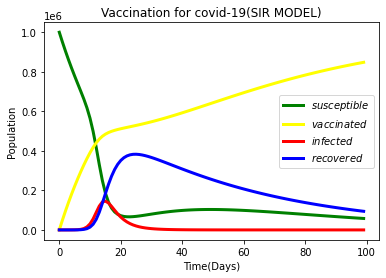

In [ ]:
#SIR model for vaccination
import matplotlib.pyplot as plt
import numpy as np
import math
R=5               #Reproduction no.
g=5/14            #Recovery rate
b=R*g             #Rate of infection
p=0.05            #Factor determining fraction of susceptible people vaccinated
N=1000000         #Size of compartment/population
v=1/50            #1/v is time taken to lose immunity

#Differential equations governing vaccination process
def f(S,I,R):
    dSdt=-b*S*I/N-p*S+v*R
    dVdt=p*S
    dIdt=b*I*S/N-g*I
    dRdt=g*I-v*R
    return dSdt,dVdt,dIdt,dRdt
y=[999999,1,1,0]
k1=np.zeros(4)
k2=np.zeros(4)
k3=np.zeros(4)
k4=np.zeros(4)
n=100
t=[]
sm=[]
vm=[]
im=[]
rm=[]
#using RK4
def SIR(y):
    h=1
    for i in range(n):
        sm.append(y[0])
        vm.append(y[1])
        im.append(y[2])
        rm.append(y[3])
        t.append(i)
        k1[0],k1[1],k1[2],k1[3]=(f(y[0],y[2],y[3]))
        k2[0],k2[1],k2[2],k2[3]=f(y[0]+k1[0]*(h/2),y[2]+(k1[2]*h/2),y[3]+(k1[2]*h/2))
        k3[0],k3[1],k3[2],k3[3]=f(y[0]+k2[0]*(h/2),y[2]+(k2[2]*h/2),y[3]+(k2[2]*h/2))
        k4[0],k4[1],k4[2],k4[3]=f(y[0]+k3[0]*h,y[2]+(k3[2]*h),y[3]+(k3[2]*h))
        y=y+(k1+2*k2+2*k3+k4)*h/6
    return y
print(SIR(y))
plt.plot(t, sm, label='$susceptible$ ',color='green',linewidth=3) # plotting t, n_S separately 
plt.plot(t, vm, label='$vaccinated$ ',color='yellow',linewidth=3) # plotting t, n_V separately 
plt.plot(t, im, label='$infected$ ',color='red',linewidth=3) # plotting t, n_I separately 
plt.plot(t, rm, label='$recovered$ ',color='blue',linewidth=3) # plotting t, n_R separately 
plt.legend(loc='best')
plt.xlabel('Time(Days)')
plt.ylabel('Population')
plt.title('Vaccination for covid-19(SIR MODEL)')
plt.show()

### **Vaccination** **campaign**:

[197100.94114794 129634.41678977  35009.93055861 638255.71150367]


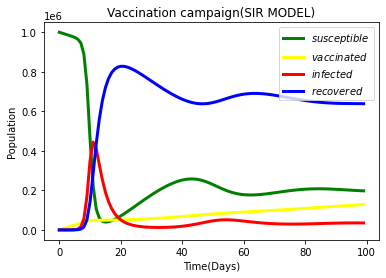

In [ ]:
#Vaccination camp
#------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
import math
R=5               #Reproduction no.
g=5/14            #Recovery rate
b=R*g             #Rate of infection
#Factor determining fraction of susceptible people vaccinated
def p(t):
    if(t>6.24):
        pi=0.005
    else:
        pi=0
    return pi
N=1000000         #Size of compartment/population
v=1/50            #1/v is time taken to lose immunity

#Differential equations governing vaccination process
def f(S,I,R):
    dSdt=-b*S*I/N-p(n)*S+v*R
    dVdt=p(n)*S
    dIdt=b*I*S/N-g*I
    dRdt=g*I-v*R
    return dSdt,dVdt,dIdt,dRdt
y=[999999,1,1,0]
k1=np.zeros(4)
k2=np.zeros(4)
k3=np.zeros(4)
k4=np.zeros(4)
n=100
t=[]
sm=[]
vm=[]
im=[]
rm=[]
#using RK4
def SIR(y):
    h=1
    for i in range(n):
        sm.append(y[0])
        vm.append(y[1])
        im.append(y[2])
        rm.append(y[3])
        t.append(i)
        k1[0],k1[1],k1[2],k1[3]=(f(y[0],y[2],y[3]))
        k2[0],k2[1],k2[2],k2[3]=f(y[0]+k1[0]*(h/2),y[2]+(k1[2]*h/2),y[3]+(k1[2]*h/2))
        k3[0],k3[1],k3[2],k3[3]=f(y[0]+k2[0]*(h/2),y[2]+(k2[2]*h/2),y[3]+(k2[2]*h/2))
        k4[0],k4[1],k4[2],k4[3]=f(y[0]+k3[0]*h,y[2]+(k3[2]*h),y[3]+(k3[2]*h))
        y=y+(k1+2*k2+2*k3+k4)*h/6
    return y
print(SIR(y))
plt.plot(t, sm, label='$susceptible$ ',color='green',linewidth=3) # plotting t, n_S separately 
plt.plot(t, vm, label='$vaccinated$ ',color='yellow',linewidth=3) # plotting t, n_V separately 
plt.plot(t, im, label='$infected$ ',color='red',linewidth=3) # plotting t, n_I separately 
plt.plot(t, rm, label='$recovered$ ',color='blue',linewidth=3) # plotting t, n_R separately 
plt.legend(loc='best')
plt.xlabel('Time(Days)')
plt.ylabel('Population')
plt.title('Vaccination campaign(SIR MODEL)')
plt.show()

### **Time Restricted immunity :**

[196651.36006948  42761.83716055 760586.80276997]


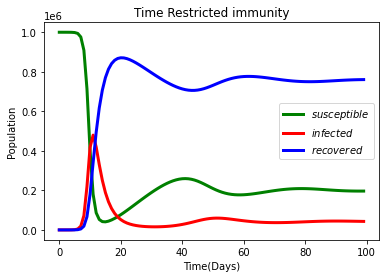

In [ ]:
#Time Restricted immunity :
import matplotlib.pyplot as plt
import numpy as np
R=5
g=5/14
b=R*g
v=1/50                  #1/v is typical time to lose immunity
N=1000000
def f(S,I,R):
    dSdt=-b*I*S/N+v*R
    dIdt=b*I*S/N-g*I
    dRdt=g*I-v*R
    return dSdt,dIdt,dRdt
y=[999999,1,0]
k1=np.zeros(3)
k2=np.zeros(3)
k3=np.zeros(3)
k4=np.zeros(3)
n=100
t=[]
sm=[]
im=[]
rm=[]
def SIR(y):
    h=1
    for i in range(n):
        sm.append(y[0])
        im.append(y[1])
        rm.append(y[2])
        t.append(i)
        k1[0],k1[1],k1[2]=(f(y[0],y[1],y[2]))
        k2[0],k2[1],k2[2]=f(y[0]+k1[0]*(h/2),y[1]+(k1[1]*h/2),y[2]+(k1[2]*h/2))
        k3[0],k3[1],k3[2]=f(y[0]+k2[0]*(h/2),y[1]+(k2[1]*h/2),y[2]+(k2[2]*h/2))
        k4[0],k4[1],k4[2]=f(y[0]+k3[0]*h,y[1]+k3[1]*h,y[2]+k3[2]*h)
        y=y+(k1+2*k2+2*k3+k4)*h/6
    return y
print(SIR(y))
plt.plot(t, sm, label='$susceptible$ ',color='green',linewidth=3) # plotting t, n_S separately 
plt.plot(t, im, label='$infected$ ',color='red',linewidth=3) # plotting t, n_I separately 
plt.plot(t, rm, label='$recovered$ ',color='blue',linewidth=3) # plotting t, n_R separately 
plt.legend(loc='best')
plt.xlabel('Time(Days)')
plt.ylabel('Population')
plt.title('Time Restricted immunity')
plt.show()

# SEIR MODEL

SEIR MODEL


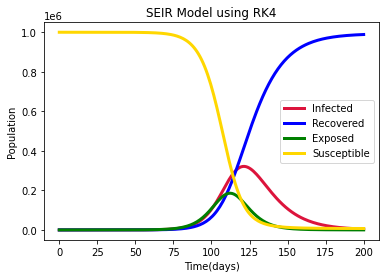

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

N=1000000   #population
gamma=1/14  #gamma=1/infection lasts for 14 days
delta=1/6   #delta=1/incubation period of six days 
beta=5/14   #beta=R0*gamma (R0=5)
n=200       #no. of days to be studied
t=np.linspace(0,n,n)

#Solving differential equations for SEIR using RK4 method:-
def RK4(n, beta, gamma, delta, S0, I0, R0, E0, dt = 1):
   
    S=np.empty(n)
    I=np.empty(n)
    R=np.empty(n)
    E=np.empty(n)
    S[0],I[0],R[0],E[0]=S0,I0,R0,E0
    
    def dSdt(t, S, I):
        return(-beta * S * I / N)

    def dEdt(t, S, I, E):
        return ( (beta * S * I / N) - delta * E)
    
    def dIdt(t, E, I):
       return( delta * E - gamma * I)

    def dRdt(t, I): 
        return(gamma * I)
  
    for i in range(0,n-1):
        Si = S[i]
        Ii = I[i]
        Ri = R[i]
        Ei = E[i]
        
        S_k1 = dSdt(i, Si, Ii)
        E_k1 = dEdt(t, Si, Ii, Ei)
        I_k1 = dIdt(i, Ei, Ii)
        R_k1 = dRdt(i, Ii)
    
        S_k2 = dSdt(i + dt / 2, Si + dt / 2 * S_k1, Ii + dt / 2 * I_k1)
        E_k2 = dEdt(i + dt / 2, Si + dt / 2 * S_k1, Ii + dt / 2 * I_k1, Ei + dt / 2 * E_k1)
        I_k2 = dIdt(i + dt / 2, Ei + dt / 2 * E_k1, Ii + dt / 2 * I_k1)
        R_k2 = dRdt(i + dt / 2, Ii + dt / 2 * I_k1)
    
        S_k3 = dSdt(i + dt / 2, Si + dt / 2 * S_k2, Ii + dt / 2 * I_k2)
        E_k3 = dEdt(i + dt / 2, Si + dt / 2 * S_k2, Ii + dt / 2 * I_k2, Ei + dt / 2 * E_k2)
        I_k3 = dIdt(i + dt / 2, Ei + dt / 2 * E_k2, Ii + dt / 2 * I_k2)
        R_k3 = dRdt(i + dt / 2, Ii + dt / 2 * I_k2)
    
        S_k4 = dSdt(i + dt, Si + dt * S_k3, Ii + dt * I_k3)
        E_k4 = dEdt(i + dt, Si + dt * S_k3, Ii + dt * I_k3, Ei + dt * E_k3)
        I_k4 = dIdt(i + dt, Ei + dt * E_k3, Ii + dt * I_k3)
        R_k4 = dRdt(i + dt, Ii + dt * I_k3)
    
        S[i + 1] = Si + dt / 6 * (S_k1 + 2 * S_k2 + 2 * S_k3 + S_k4)
        E[i + 1] = Ei + dt / 6 * (E_k1 + 2 * E_k2 + 2 * E_k3 + E_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        R[i + 1] = Ri + dt / 6 * (R_k1 + 2 * R_k2 + 2 * R_k3 + R_k4)
  
    plt.plot(t,I,label='Infected',color='crimson',linewidth=3)
    plt.plot(t,R,label='Recovered',color='blue',linewidth=3)
    plt.plot(t,E,label='Exposed',color='g',linewidth=3)
    plt.plot(t,S,label='Susceptible',color='gold',linewidth=3)
    plt.legend(loc='best')
    plt.title("SEIR Model using RK4",loc='center')
    plt.xlabel('Time(days)')
    plt.ylabel('Population')
    plt.show()


RK4(200, 5/14, 1/14, 1/6, 999999, 0, 0, 1, 1)


# SEIRD MODEL

SEIRD MODEL



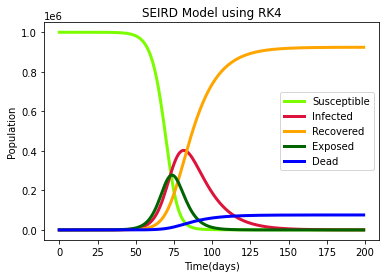

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1_000_000
D = 14 # infections lasts 14 days
gamma = 1.0 / D
delta = 1.0 / 6  # incubation period of six days
R_0 = 5.0
alpha = 0.05  #  death rate
beta = R_0 * (gamma + alpha) # R_0 = beta / gamma+alpha

rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-100, 100, 0, 0, 0  # initial conditions
n=200
t=[x for x in range(n)] # no of days

def RK4(n, beta, gamma, delta, alpha, rho, S0, E0, I0, R0, D0, dt = 1):
     
    S=np.empty(n)
    I=np.empty(n)
    R=np.empty(n)
    E=np.empty(n)
    D=np.empty(n)
    S[0],I[0],R[0],E[0],D[0]=S0,I0,R0,E0,D0
    
    def dSdt(t, S, I):
        return(-beta * S * I / N)

    def dEdt(t, S, I, E):
        return ( (beta * S * I / N) - delta * E)
    
    def dIdt(t, E, I):
       return( delta * E - (1 - alpha) * gamma * I - alpha * rho * I)

    def dRdt(t, I): 
        return( (1 - alpha) * gamma * I)
    
    def dDdt(t,I):
        return( alpha * rho * I)
  
    for i in range(0,n-1):
        Si = S[i]
        Ii = I[i]
        Ri = R[i]
        Ei = E[i]
        Di = D[i]

        S_k1 = dSdt(i, Si, Ii)
        E_k1 = dEdt(t, Si, Ii, Ei)
        I_k1 = dIdt(i, Ei, Ii)
        R_k1 = dRdt(i, Ii)
        D_k1 = dDdt(i, Ii)
        
        S_k2 = dSdt(i + dt / 2, Si + dt / 2 * S_k1, Ii + dt / 2 * I_k1)
        E_k2 = dEdt(i + dt / 2, Si + dt / 2 * S_k1, Ii + dt / 2 * I_k1, Ei + dt / 2 * E_k1)
        I_k2 = dIdt(i + dt / 2, Ei + dt / 2 * E_k1, Ii + dt / 2 * I_k1)
        R_k2 = dRdt(i + dt / 2, Ii + dt / 2 * I_k1)
        D_k2 = dDdt(i + dt / 2, Ii + dt / 2 * I_k1)
    
        S_k3 = dSdt(i + dt / 2, Si + dt / 2 * S_k2, Ii + dt / 2 * I_k2)
        E_k3 = dEdt(i + dt / 2, Si + dt / 2 * S_k2, Ii + dt / 2 * I_k2, Ei + dt / 2 * E_k2)
        I_k3 = dIdt(i + dt / 2, Ei + dt / 2 * E_k2, Ii + dt / 2 * I_k2)
        R_k3 = dRdt(i + dt / 2, Ii + dt / 2 * I_k2)
        D_k3 = dDdt(i + dt / 2, Ii + dt / 2 * I_k2)
    
        S_k4 = dSdt(i + dt, Si + dt * S_k3, Ii + dt * I_k3)
        E_k4 = dEdt(i + dt, Si + dt * S_k3, Ii + dt * I_k3, Ei + dt * E_k3)
        I_k4 = dIdt(i + dt, Ei + dt * E_k3, Ii + dt * I_k3)
        R_k4 = dRdt(i + dt, Ii + dt * I_k3)
        D_k4 = dDdt(i + dt, Ii + dt * I_k3)
    
        S[i + 1] = Si + dt / 6 * (S_k1 + 2 * S_k2 + 2 * S_k3 + S_k4)
        E[i + 1] = Ei + dt / 6 * (E_k1 + 2 * E_k2 + 2 * E_k3 + E_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        R[i + 1] = Ri + dt / 6 * (R_k1 + 2 * R_k2 + 2 * R_k3 + R_k4)
        D[i + 1] = Di + dt / 6 * (D_k1 + 2 * D_k2 + 2 * D_k3 + D_k4)

    plt.plot(t,S,label='Susceptible',color='lawngreen',linewidth=3)    
    plt.plot(t,I,label='Infected',color='crimson',linewidth=3)
    plt.plot(t,R,label='Recovered',color='orange',linewidth=3)
    plt.plot(t,E,label='Exposed',color='darkgreen',linewidth=3)
    plt.plot(t,D,label='Dead', color="blue",linewidth=3)
    plt.legend(loc='best')
    plt.title("SEIRD Model using RK4",loc='center')
    plt.xlabel('Time(days)')
    plt.ylabel('Population')
    plt.show()

RK4(n, beta,gamma,delta,alpha,rho, N-1, 1, 0, 0 ,0, 1)

# Finding R0 for Allison Hill Model


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue May 26 22:46:27 2020

@author: cosmos
"""
import numpy as np

b1=0.500
b2=0.100
b3=0.100
a=0.200
g1=0.133
g2=0.125
g3=0.060
p1=0.033
p2=0.042
mu=0.05

A=np.array([[a,0,0,0],[0,g1+p1,0,0],[0,0,g2+p2,0],[0,0,0,g3+mu]]) # Sigma array
T=np.array([[0,b1,b2,b3],[a,0,0,0],[0,p1,0,0],[0,0,p2,0]])  #T array
B=np.eye(len(A)) # makes identity matrix

#Using LU decompostion to find inverse of sigma matrix
def LU(A,B,n):
    L,U=forw_elim(A,n)
    D=forw_sub(L,B,n)
    x=back_sub(U,D,n)
   
    return (x)

def forw_elim(A,n):
    L=np.eye(len(A))
    n=len(A)
    for i in range(n):
        for j in range(i+1,n):
            
            fac=A[j][i]/A[i][i]
            L[j][i]=fac
            
            for k in range(i,n):
                A[j][k]-= fac*A[i][k]
    return(L,A)
        
def forw_sub(L,B,n):
    n=len(L)
    D=[0 for i in range(n)]
   
    D[0]=B[0]/L[0][0]
    for i in range(1,n):
        s=0
        for j in range(0,i):
            s+= L[i][j]*D[j]
            D[i]=(B[i]-s)/L[i][i]
        
    return D     
        
def back_sub(U,D,n):
    n=len(U)
    x=[0 for i in range(n)]
   
    x[n-1]=D[n-1]/U[n-1][n-1]
    for i in range(n-2,-1,-1):
        s=0
        for j in range(i+1,n):
            s+= U[i][j]*x[j]
            x[i]=(D[i]-s)/U[i][i]
        
    return x     
      
def Transpose(A):
    nr=len(A)
    nc=len(A[0])
    At=np.zeros((nc,nr))
    
    for i in range(nc):
        for j in range(nr):
            At[i][j]=A[j][i]
            
    return(At)
       
def Inv(A,B):
    n=len(A)
    A_Inv=np.zeros(shape=(n,n))
    for i in range(0,n):
        K=np.copy(A)
        A_Inv[i]=LU(K,B[i],n)
    return(Transpose(A_Inv))

print("Sigma inverse matrix is :\n",Inv(A,B))
print("\n")
print("T times Sigma inverse \n", np.dot(T,Inv(A,B)),"\n")  
    
NGM=np.dot(T,Inv(A,B))
#m=np.matrix([[0, 3.012, 0.5988, 0.8],[1 ,0, 0, 0],[0 ,0.1988 ,0, 0],[0, 0, 0.2515, 0]])
eigenvalues = np.linalg.eigvals(NGM)
print("R0 is \n", max(eigenvalues))


Sigma inverse matrix is :
 [[5.         0.         0.         0.        ]
 [0.         6.02409639 0.         0.        ]
 [0.         0.         5.98802395 0.        ]
 [0.         0.         0.         9.09090909]]


T times Sigma inverse 
 [[0.         3.01204819 0.5988024  0.90909091]
 [1.         0.         0.         0.        ]
 [0.         0.19879518 0.         0.        ]
 [0.         0.         0.25149701 0.        ]] 

R0 is 
 (1.7590926893123728+0j)


#Lockdown


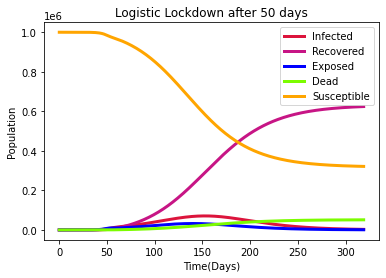

total recov= 624112.9431741864
total infected 677915.7263506638
total dead 51096.966107828135
sus left 321327.7915814446


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May  8 12:27:57 2020

@author: cosmos
"""

import numpy as np
import matplotlib.pyplot as plt




L=100                  # no of days after which lockdown occurs
N = 1_000_000          # Population of city
gamma = 1/ 14          # Takes average 14 days to recover
delta = 1 / 6          # average incubation period of six days
alpha = 0.05           # mortality rate
rho = 1/9               # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions
n=500                   # no. of days to be studied
t=[x for x in range(n)]
def RK4SIR(n, gamma, delta, alpha, rho, S0, I0, R0, E0, D0, dt = 1):   # rk4 function
   
  
    S=np.zeros(n)
    I=np.zeros(n)
    R=np.zeros(n)
    E=np.zeros(n)
    D=np.zeros(n)
    S[0],I[0],R[0],E[0],D[0]=S0,I0,R0,E0,D0
    
    
  
    for i in range(0,n-1):
        
        R_0_start, k, x0, R_0_end = 5.0, 0.5, 15, 1

        def logistic_R_0(i):
            return (R_0_start-R_0_end) / (1 + np.exp(-k*(-i+x0))) + R_0_end

        def beta(i):
            return(logistic_R_0(i) * (gamma+alpha))
        
        def dSdt(t, S, I):
            return(-(beta(i)) * S * I / N)

        def dEdt(t, S, I, E):
            return ( (beta(i) * S * I / N) - delta * E)
    
        def dIdt(t, E, I):
            return( delta * E - (1 - alpha) * gamma * I - alpha * rho * I)

        def dRdt(t, I): 
            return( (1 - alpha) * gamma * I)
    
        def dDdt(t,I):
            return( alpha * rho * I)
        
        Si = S[i]
        Ii = I[i]
        Ri = R[i]
        Ei = E[i]
        Di = D[i]
   
    
        S_k1 = dSdt(i, Si, Ii)
        E_k1 = dEdt(t, Si, Ii, Ei)
        I_k1 = dIdt(i, Ei, Ii)
        R_k1 = dRdt(i, Ii)
        D_k1 = dDdt(i, Ii)
        
        S_k2 = dSdt(i + dt / 2, Si + dt / 2 * S_k1, Ii + dt / 2 * I_k1)
        E_k2 = dEdt(i + dt / 2, Si + dt / 2 * S_k1, Ii + dt / 2 * I_k1, Ei + dt / 2 * E_k1)
        I_k2 = dIdt(i + dt / 2, Ei + dt / 2 * E_k1, Ii + dt / 2 * I_k1)
        R_k2 = dRdt(i + dt / 2, Ii + dt / 2 * I_k1)
        D_k2 = dDdt(i + dt / 2, Ii + dt / 2 * I_k1)
    
        S_k3 = dSdt(i + dt / 2, Si + dt / 2 * S_k2, Ii + dt / 2 * I_k2)
        E_k3 = dEdt(i + dt / 2, Si + dt / 2 * S_k2, Ii + dt / 2 * I_k2, Ei + dt / 2 * E_k2)
        I_k3 = dIdt(i + dt / 2, Ei + dt / 2 * E_k2, Ii + dt / 2 * I_k2)
        R_k3 = dRdt(i + dt / 2, Ii + dt / 2 * I_k2)
        D_k3 = dDdt(i + dt / 2, Ii + dt / 2 * I_k2)
    
    
        S_k4 = dSdt(i + dt, Si + dt * S_k3, Ii + dt * I_k3)
        E_k4 = dEdt(i + dt, Si + dt * S_k3, Ii + dt * I_k3, Ei + dt * E_k3)
        I_k4 = dIdt(i + dt, Ei + dt * E_k3, Ii + dt * I_k3)
        R_k4 = dRdt(i + dt, Ii + dt * I_k3)
        D_k4 = dDdt(i + dt, Ii + dt * I_k3)
    
        S[i + 1] = Si + dt / 6 * (S_k1 + 2 * S_k2 + 2 * S_k3 + S_k4)
        E[i + 1] = Ei + dt / 6 * (E_k1 + 2 * E_k2 + 2 * E_k3 + E_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        R[i + 1] = Ri + dt / 6 * (R_k1 + 2 * R_k2 + 2 * R_k3 + R_k4)
        D[i + 1] = Di + dt / 6 * (D_k1 + 2 * D_k2 + 2 * D_k3 + D_k4)
  
    plt.plot(t,I,label='Infected',color='crimson',linewidth=3)
    plt.plot(t,R,label='Recovered',color='mediumvioletred',linewidth=3)
    plt.plot(t,E,label='Exposed',color='blue',linewidth=3)
    plt.plot(t,D,label='Dead',color='lawngreen',linewidth=3)
    plt.plot(t,S,label='Susceptible',color='orange',linewidth=3)
    plt.legend(loc='best')
    plt.title("Logistic Lockdown after 15 days",loc='center')
    plt.xlabel('Time(Days)')
    plt.ylabel('Population')
    plt.show()
    
    #print("total recov=",R[-1])
    #print("total infected", R[-1]+D[-1]+I[-1])
    #print("total dead", D[-1])
    
    #print("sus left",S[-1])

RK4SIR(n, gamma, delta, alpha, rho, S0, I0, R0, E0, D0, 1)



# LOCKDOWN & AGE RELATED ANALYSIS

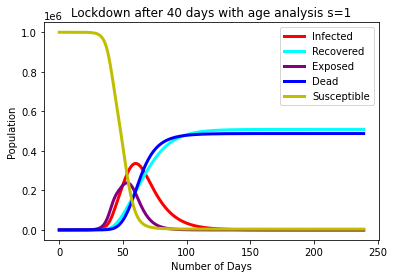

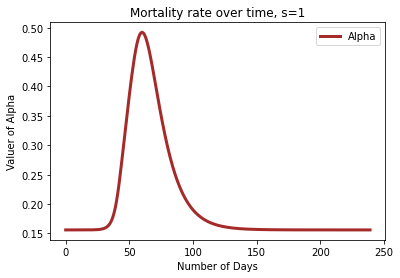

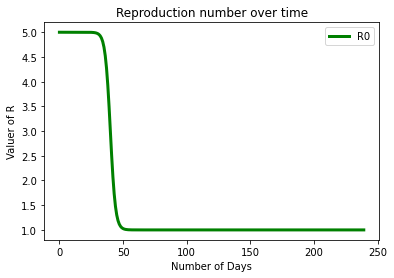

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 1_000_000          # Population of city
gamma = 1/ 14          # Takes average 14 days to recover
delta = 1 / 6          # average incubation period of six days
#alpha = 0.05            # mortality rate
rho = 1/9               # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions
n=240                   # no. of days to be studied
t=[x for x in range(n)]


def RK4SIR(n, gamma, delta, rho, S0, I0, R0, E0, D0, dt = 1):   # rk4 function
   
  
    S=np.zeros(n)
    I=np.zeros(n)
    R=np.zeros(n)
    E=np.zeros(n)
    D=np.zeros(n)
    S[0],I[0],R[0],E[0],D[0]=S0,I0,R0,E0,D0
    
    
    alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
    proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
    s = 1 #scaling factor
    alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys())) #dictionary of age and mortality rate

    
    for i in range(0,n-1):
        
        
  
        R_0_start, k, x0, R_0_end = 5.0, 0.5, 40, 1

        def logistic_R_0(i):
            return (R_0_start-R_0_end) / (1 + np.exp(-k*(-i+x0))) + R_0_end
        
        def alpha(i):
            return( s*I[i]/N + alpha_opt)

        def beta(i):
            return(logistic_R_0(i) * (gamma +alpha(i)))
        
        def dSdt(t, S, I):
            return(-(beta(i)) * S * I / N)

        def dEdt(t, S, I, E):
            return ( (beta(i) * S * I / N) - delta * E)
    
        def dIdt(t, E, I):
            return( delta * E - (1 - alpha(i)) * gamma * I - alpha(i) * rho * I)

        def dRdt(t, I): 
            return( (1 - alpha(i)) * gamma * I)
    
        def dDdt(t,I):
            return( alpha(i) * rho * I)
        
        Si = S[i]
        Ii = I[i]
        Ri = R[i]
        Ei = E[i]
        Di = D[i]
   
    
        S_k1 = dSdt(i, Si, Ii)
        E_k1 = dEdt(i, Si, Ii, Ei)
        I_k1 = dIdt(i, Ei, Ii)
        R_k1 = dRdt(i, Ii)
        D_k1 = dDdt(i, Ii)
        
        S_k2 = dSdt(i + dt / 2, Si + dt / 2 * S_k1, Ii + dt / 2 * I_k1)
        E_k2 = dEdt(i + dt / 2, Si + dt / 2 * S_k1, Ii + dt / 2 * I_k1, Ei + dt / 2 * E_k1)
        I_k2 = dIdt(i + dt / 2, Ei + dt / 2 * E_k1, Ii + dt / 2 * I_k1)
        R_k2 = dRdt(i + dt / 2, Ii + dt / 2 * I_k1)
        D_k2 = dDdt(i + dt / 2, Ii + dt / 2 * I_k1)
    
        S_k3 = dSdt(i + dt / 2, Si + dt / 2 * S_k2, Ii + dt / 2 * I_k2)
        E_k3 = dEdt(i + dt / 2, Si + dt / 2 * S_k2, Ii + dt / 2 * I_k2, Ei + dt / 2 * E_k2)
        I_k3 = dIdt(i + dt / 2, Ei + dt / 2 * E_k2, Ii + dt / 2 * I_k2)
        R_k3 = dRdt(i + dt / 2, Ii + dt / 2 * I_k2)
        D_k3 = dDdt(i + dt / 2, Ii + dt / 2 * I_k2)
    
    
        S_k4 = dSdt(i + dt, Si + dt * S_k3, Ii + dt * I_k3)
        E_k4 = dEdt(i + dt, Si + dt * S_k3, Ii + dt * I_k3, Ei + dt * E_k3)
        I_k4 = dIdt(i + dt, Ei + dt * E_k3, Ii + dt * I_k3)
        R_k4 = dRdt(i + dt, Ii + dt * I_k3)
        D_k4 = dDdt(i + dt, Ii + dt * I_k3)
        
    

        S[i + 1] = Si + dt / 6 * (S_k1 + 2 * S_k2 + 2 * S_k3 + S_k4)
        E[i + 1] = Ei + dt / 6 * (E_k1 + 2 * E_k2 + 2 * E_k3 + E_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        R[i + 1] = Ri + dt / 6 * (R_k1 + 2 * R_k2 + 2 * R_k3 + R_k4)
        D[i + 1] = Di + dt / 6 * (D_k1 + 2 * D_k2 + 2 * D_k3 + D_k4)
        
    Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(S))]  # to plot alpha over time
    R0_time = [logistic_R_0(i) for i in range(len(S))]                 # how R varies over time
        
    plt.plot(t,I,label='Infected',color='r',linewidth=3)
    plt.plot(t,R,label='Recovered',color='cyan',linewidth=3)
    plt.plot(t,E,label='Exposed',color='purple',linewidth=3)
    plt.plot(t,D,label='Dead',color='b',linewidth=3)
    plt.plot(t,S,label='Susceptible',color='y',linewidth=3)
    plt.legend(loc='best')
    plt.title("Lockdown after 40 days with age analysis s=1",loc='center')
    plt.xlabel('Number of Days')
    plt.ylabel('Population')
    plt.show()
    plt.plot(t,Alpha_over_time,color='brown',label='Alpha',linewidth=3)
    plt.title('Mortality rate over time, s=1')
    plt.xlabel('Number of Days')
    plt.ylabel('Valuer of Alpha')
    plt.legend(loc='best')
    plt.show()
    plt.plot(t,R0_time,color='green',label='R0',linewidth=3)
    plt.title('Reproduction number over time')
    plt.xlabel('Number of Days')
    plt.ylabel('Valuer of R')
    plt.legend(loc='best')
    plt.show()
    

RK4SIR(n, gamma, delta, rho, S0, I0, R0, E0, D0, 1)





# ALLISON HILL MODEL




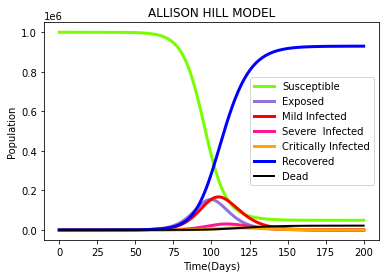

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May 17 00:26:37 2020

@author: cosmos
"""
import numpy as np
import matplotlib.pyplot as plt

N=1000000
b1=0.500
b2=0.100
b3=0.100
delta=0.200
g1=0.133
g2=0.125
g3=0.060
p1=0.033
p2=0.042
mu=0.05
n=200
t=np.linspace(0,n,n)

def RK4(n, S0, E0, I1_0, I2_0, I3_0, R0, D0, dt = 1):
     
    S = np.empty(n)
    I1 = np.empty(n)
    I2 = np.empty(n)
    I3 = np.empty(n)
    R = np.empty(n)
    E = np.empty(n)
    D = np.empty(n)
    S[0],I1[0],I2[0],I3[0],R[0],E[0],D[0]=S0,I1_0,I2_0,I3_0,R0,E0,D0
    
    def dSdt(t, S, I1, I2, I3):
        return(-(S/N)*(b1*I1 +b2*I2 +b3*I3))

    def dEdt(t, S, I1, I2, I3, E):
        return ( (S/N)*(b1*I1 +b2*I2 +b3*I3) - delta * E)
    
    def dI1dt(t, E, I1):
       return( delta * E - (g1+p1)*I1)
   
    def dI2dt(t, I1, I2):
       return( p1*I1 - (g2+p2)*I2)
   
    def dI3dt(t, I2, I3):
       return( p2*I2 - (g3+mu)*I3)

    def dRdt(t, I1,I2,I3): 
        return((g1*I1 + g2*I2 + g3*I3))
    
    def dDdt(t,I3):
        return(mu*I3)
    
    for i in range(0,n-1):
        Si = S[i]
        I1i = I1[i]
        I2i = I2[i]
        I3i = I3[i]
        Ri = R[i]
        Ei = E[i]
        Di = D[i]
            
        S_k1 = dSdt(i, Si, I1i, I2i, I3i)
        E_k1 = dEdt(t, Si, I1i, I2i, I3i , Ei)
        I1_k1 = dI1dt(i, Ei, I1i)
        I2_k1 = dI2dt(i, I1i, I2i)
        I3_k1 = dI3dt(i, I2i, I3i)
        R_k1 = dRdt(i, I1i, I2i, I3i)
        D_k1 = dDdt(i, I3i)
    
        S_k2 = dSdt(i + dt / 2, Si + dt / 2 * S_k1, I1i + dt / 2 * I1_k1, I2i + dt / 2 * I2_k1, I3i + dt / 2 * I3_k1)
        E_k2 = dEdt(i + dt / 2, Si + dt / 2 * S_k1, I1i + dt / 2 * I1_k1, I2i + dt / 2 * I2_k1, I3i + dt / 2 * I3_k1, Ei + dt / 2 * E_k1)
        I1_k2 = dI1dt(i + dt / 2, Ei + dt / 2 * E_k1, I1i + dt / 2 * I1_k1)
        I2_k2 = dI2dt(i + dt / 2, I1i + dt / 2 * I1_k1, I2i + dt / 2 * I2_k1)
        I3_k2 = dI3dt(i + dt / 2, I2i + dt / 2 * I2_k1, I3i + dt / 2 * I3_k1)
        R_k2 = dRdt(i + dt / 2, I1i + dt / 2 * I1_k1,  I2i + dt / 2 * I2_k1, I3i + dt / 2 * I3_k1)
        D_k2 = dDdt(i + dt / 2, I3i + dt / 2 * I3_k1)
    
        S_k3 = dSdt(i + dt / 2, Si + dt / 2 * S_k2,I1i + dt / 2 * I1_k2, I2i + dt / 2 * I2_k2, I3i + dt / 2 * I3_k2)
        E_k3 = dEdt(i + dt / 2, Si + dt / 2 * S_k2, I1i + dt / 2 * I1_k2, I2i + dt / 2 * I2_k2, I3i + dt / 2 * I3_k2, Ei + dt / 2 * E_k2)
        I1_k3 = dI1dt(i + dt / 2, Ei + dt / 2 * E_k2, I1i + dt / 2 * I1_k2)
        I2_k3 = dI2dt(i + dt / 2, I1i + dt / 2 * I1_k2, I2i + dt / 2 * I2_k2)
        I3_k3 = dI3dt(i + dt / 2, I2i + dt / 2 * I2_k2, I3i + dt / 2 * I3_k2)
        R_k3 = dRdt(i + dt / 2,  I1i + dt / 2 * I1_k2,  I2i + dt / 2 * I2_k2, I3i + dt / 2 * I3_k2)
        D_k3 = dDdt(i + dt / 2, I3i + dt / 2 * I3_k2)
    
        S_k4 = dSdt(i + dt, Si + dt * S_k3, I1i + dt * I1_k3, I2i + dt * I2_k3, I3i + dt * I3_k3)
        E_k4 = dEdt(i + dt, Si + dt * S_k3,  I1i + dt * I1_k3, I2i + dt * I2_k3, I3i + dt * I3_k3, Ei + dt * E_k3)
        I1_k4 = dI1dt(i + dt, Ei + dt * E_k3, I1i + dt * I1_k3)
        I2_k4 = dI2dt(i + dt, I1i + dt * I1_k3, I2i + dt * I2_k3)
        I3_k4 = dI3dt(i + dt, I2i + dt * I2_k3, I3i + dt * I3_k3)
        R_k4 = dRdt(i + dt,  I1i + dt * I1_k3, I2i + dt * I2_k3, I3i + dt * I3_k3)
        D_k4 = dDdt(i + dt, I3i + dt * I3_k3)
        
        S[i + 1] = Si + dt / 6 * (S_k1 + 2 * S_k2 + 2 * S_k3 + S_k4)
        E[i + 1] = Ei + dt / 6 * (E_k1 + 2 * E_k2 + 2 * E_k3 + E_k4)
        I1[i + 1] = I1i + dt / 6 * (I1_k1 + 2 * I1_k2 + 2 * I1_k3 + I1_k4)
        I2[i + 1] = I2i + dt / 6 * (I2_k1 + 2 * I2_k2 + 2 * I2_k3 + I2_k4)
        I3[i + 1] = I3i + dt / 6 * (I3_k1 + 2 * I3_k2 + 2 * I3_k3 + I3_k4)
        R[i + 1] = Ri + dt / 6 * (R_k1 + 2 * R_k2 + 2 * R_k3 + R_k4)
        D[i + 1] = Di + dt / 6 * (D_k1 + 2 * D_k2 + 2 * D_k3 + D_k4)
  
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(t,S,label='Susceptible',color='lawngreen',linewidth=3)
    ax.plot(t,E,label='Exposed',color='mediumpurple',linewidth=3)
    ax.plot(t,I1,label='Mild Infected',color='red',linewidth=3)
    ax.plot(t,I2,label='Severe  Infected',color='deeppink',linewidth=3)
    ax.plot(t,I3,label='Critically Infected',color='orange',linewidth=3)
    ax.plot(t,R,label='Recovered',color='blue',linewidth=3)
    ax.plot(t,D,label='Dead',color='black',linewidth=2)
    plt.legend(loc='best')
    plt.title("ALLISON HILL MODEL",loc='center')
    plt.xlabel('Time(Days)')
    plt.ylabel('Population')
    plt.show()
    ax.set_xlim([0,150])
    
    #print(S[108],max(D),np.sum(I1)+np.sum(I2)+ np.sum(I3),max(E))


RK4(n, N-1, 0, 1, 0, 0, 0, 0, 1)

# Curve Fitting & Prediction for different countries 

Actual data--(Russia, Italy, UK, USA, India)

In [ ]:
# printing the actual data of the countries-- Russia, Italy, United Kingdom, USA, India
import numpy as np                       
import math                             
import scipy as sp
import xlrd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
loc=("C:\\Users\\DELL\\Desktop\\corona data.xlsx")          # The excel sheet containing data is located on Desktop      
wb=xlrd.open_workbook(loc)
sheet=wb.sheet_by_index(0)
sheet.cell_value(0,0)
n=sheet.ncols-1
print("no.of data points=",n) 
time=0
infected1=[]
infrate1=[]
infected2=[]
infrate2=[]
infected3=[]
infrate3=[]
infected4=[]
infrate4=[]
infected5=[]
infrate5=[]
t=[]
for i in range(35,n):
    Ip1=float(sheet.cell_value(0,i))-float(sheet.cell_value(0,i-1))
    I1=float(sheet.cell_value(0,i))
    Ip2=float(sheet.cell_value(1,i))-float(sheet.cell_value(1,i-1))
    I2=float(sheet.cell_value(1,i))
    Ip3=float(sheet.cell_value(2,i))-float(sheet.cell_value(2,i-1))
    #print(Ip3,i)
    I3=float(sheet.cell_value(2,i))
    Ip4=float(sheet.cell_value(3,i))-float(sheet.cell_value(3,i-1))
    I4=float(sheet.cell_value(3,i))
    Ip5=float(sheet.cell_value(4,i))-float(sheet.cell_value(4,i-1))
    I5=float(sheet.cell_value(4,i))
    time+=1
    infrate1.append((Ip1))
    infected1.append((I1))
    infrate2.append((Ip2))
    infected2.append((I2))
    infrate3.append((Ip3))
    infected3.append((I3))
    infrate4.append((Ip4))
    infected4.append((I4))
    infrate5.append((Ip5))
    infected5.append((I5))
    t.append((time))
fig,ax = plt.subplots(nrows=2, ncols=4, sharex=True, figsize=(20,10))
ax[0][0].scatter(t,infected1,label='INFECTED', color="red")
ax[0][0].set(title="Russia",ylabel='population',xlabel='no. of days')
ax[0][0].legend(loc="best",shadow="true")
ax[1][0].bar(t,infrate1,label='PER DAY INFECTED', color="black")
ax[1][0].set(ylabel='population',xlabel='number of days')
ax[1][0].legend(loc="best",shadow="true")
ax[0][1].scatter(t,infected2,label='INFECTED', color="red")
ax[0][1].set(title="Italy",xlabel='no of days')
ax[0][1].legend(loc="best",shadow="true")
ax[1][1].bar(t,infrate2,label='PER DAY INFECTED', color="black")
ax[1][1].set(ylabel='population',xlabel='number of days')
ax[1][1].legend(loc="best",shadow="true")
ax[0][2].scatter(t,infected3,label='INFECTED', color="red")
ax[0][2].set(title="UK",xlabel='no.of days')
ax[0][2].legend(loc="best",shadow="true")
ax[1][2].bar(t,infrate3,label='PER DAY INFECTED', color="black")
ax[1][2].set(ylabel='population',xlabel='number of days')
ax[1][2].legend(loc="best",shadow="true")
ax[0][3].scatter(t,infected4,label='INFECTED', color="red")
ax[0][3].set(title="USA",xlabel='no. of days')
ax[0][3].legend(loc="best",shadow="true")
ax[1][3].bar(t,infrate4,label='PER DAY INFECTED', color="black")
ax[1][3].set(ylabel='population',xlabel='number of days')
ax[1][3].legend(loc="best",shadow="true")
fig,ax5 = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,7))
fig.suptitle("Data for INDIA",fontsize=20,fontstyle='italic')
ax5[0].scatter(t,infected5, color="red")
ax5[0].set(title="total infected cases (22/03/20 to 24/05/20)- India",xlabel='days',ylabel='no.of people')
ax5[1].bar(t,infrate5, color="black")
ax5[1].set(title="new infected cases (22/03/20 to 24/05/20)- India ",xlabel='days',ylabel='no.of people')
plt.show()

Curve Fitting for total no. of infected cases

In [ ]:
### CURVE FITTING

## fitting the logistic function to total infected cases

import warnings
warnings.filterwarnings("ignore")
from scipy.optimize import curve_fit
'''
Function to fit. In this case logistic function:
    f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def fun(X, c, k, m):
    y = c / (1 + np.exp(-k*(X-m)))
    return y
## Fit
model1,cov = curve_fit(fun,t,infected1, p0=[np.max(infected1),1,1])
model2,cov = curve_fit(fun,t,infected2, p0=[np.max(infected2),1,1])
model3,cov = curve_fit(fun,t,infected3, p0=[np.max(infected3),1,1],maxfev=2500)
model4,cov = curve_fit(fun,t,infected4, p0=[np.max(infected4),1,1])
model5,cov = curve_fit(fun,t,infected5, p0=[np.max(infected5),1,1],maxfev=1000)
print("Parameter for different countries are:")
print(model1,model2,model3,model4,model5)
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(14,14))
ax[0][0].scatter(t,infected1,label="actual data" ,color="black",lw=5)
ax[0][0].plot(t,fun(t,*model1),label="fitted data", color="red",lw=5)
ax[0][0].set(title='$Russia$',xlabel='days',ylabel='no.of people')
ax[0][0].legend(loc="best",shadow="true")
ax[0][1].scatter(t,infected2,label="actual data" ,color="black",lw=5)
ax[0][1].plot(t,fun(t,*model2),label="fitted data", color="red",lw=5)
ax[0][1].set(title='$Italy$',xlabel='days',ylabel='no.of people')
ax[0][1].legend(loc="best",shadow="true")
ax[1][0].scatter(t,infected3,label="actual data" ,color="black",lw=5)
ax[1][0].plot(t,fun(t,*model3),label="fitted data", color="red",lw=5)
ax[1][0].set(title='$UK$',xlabel='days',ylabel='no.of people')
ax[1][0].legend(loc="best",shadow="true")
ax[1][1].scatter(t,infected4,label="actual data" ,color="black",lw=5)
ax[1][1].plot(t,fun(t,*model4),label="fitted data", color="red",lw=5)
ax[1][1].set(title='$USA$',xlabel='days',ylabel='no.of people')
ax[1][1].legend(loc="best",shadow="true")
fig.suptitle("curve fitting for total no. of infected people (22/03/20 to 24/05/20)",fontsize=20,fontstyle='italic')
fig, ax5 = plt.subplots(figsize=(10,5))
ax5.scatter(t,infected5,label="actual data" ,color="black",lw=5)
ax5.plot(t,fun(t,*model5),label="fitted data", color="red",lw=5)
ax5.set(title='curve fitting for total no. of infected people (22/03/20 to 24/05/20)--India',xlabel='days',ylabel='no.of people')
ax5.legend(loc="best",shadow="true")
plt.show()

Curve Fitting for infected per day

In [ ]:
## fitting the guassian to per day infected cases

def f(X, a, b, c):
    y = a * np.exp(-0.5 * ((X-b)/c)**2)
    return y
imodel1,cov1 = curve_fit(f,t,infrate1, p0=[1, np.mean(infrate1), np.std(infrate1)])
imodel2,cov1 = curve_fit(f,t,infrate2, p0=[1, np.mean(infrate2), np.std(infrate2)])
imodel3,cov1 = curve_fit(f,t,infrate3, p0=[1, np.mean(infrate3), np.std(infrate3)])
imodel4,cov1 = curve_fit(f,t,infrate4, p0=[1, np.mean(infrate4), np.std(infrate4)],maxfev=3000)
imodel5,cov1 = curve_fit(f,t,infrate5, p0=[1, np.mean(infrate5), np.std(infrate5)])
print(imodel1,imodel2,imodel3,imodel4,imodel5)
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,15))
ax[0][0].bar(t,infrate1,label="actual  infected per day data" ,color="black")
ax[0][0].set(title='$Russia$',xlabel='days',ylabel='no.of people')
ax[0][0].plot(t,f(t,*imodel1),label="fitted data", color="red",lw=8)
ax[0][0].legend(loc="best",shadow="true")
ax[0][1].bar(t,infrate2,label="actual  infected per day data" ,color="black")
ax[0][1].plot(t,f(t,*imodel2),label="fitted data", color="red",lw=8)
ax[0][1].set(title='$Italy$',xlabel='days',ylabel='no.of people')
ax[0][1].legend(loc="best",shadow="true")
ax[1][0].bar(t,infrate3,label="actual  infected per day data" ,color="black")
ax[1][0].set(title='$UK$',xlabel='days',ylabel='no.of people')
ax[1][0].plot(t,f(t,*imodel3),label="fitted data", color="red",lw=8)
ax[1][0].legend(loc="best",shadow="true")
ax[1][1].bar(t,infrate4,label="actual  infected per day data" ,color="black")
ax[1][1].plot(t,f(t,*imodel4),label="fitted data", color="red",lw=8)
ax[1][1].set(title='$USA$',xlabel='days',ylabel='no.of people')
ax[1][1].legend(loc="best",shadow="true")
fig.suptitle("curve fitting for no. of infected people per day (22/03/20 to 24/05/20)",fontsize=20,fontstyle='italic')
fig, ax5 = plt.subplots(figsize=(10,5))
ax5.bar(t,infrate5,label="actual  infected per day data" ,color="black")
ax5.plot(t,f(t,*imodel5),label="fitted data", color="red",lw=8)
ax5.set(title='curve fitting for per day infected people (22/03/20 to 24/05/20)--India',xlabel='days',ylabel='no.of people')
ax5.legend(loc="best",shadow="true")
plt.show()

Predictions for total infected cases

In [ ]:
## PREDICTIONS
## for total infected cases
tnew=[]
tnew1=[]
tnew2=[]
tnew3=[]
tn=0
for i in range(len(t)+180):                      ##predicting for next 60 days
    tn+=1
    if(i<(len(t)+60)):
        tnew.append((tn))
    if(i<(len(t)+90)):
        tnew1.append((tn))
    if(i<len(t)+120):
        tnew2.append((tn))
    if(i<len(t)+180):
        tnew3.append((tn))
predict1=fun(tnew,*model1)
predict2=fun(tnew,*model2)
predict3=fun(tnew,*model3)
predict4=fun(tnew,*model4)
predict51=fun(tnew,*model5)
predict52=fun(tnew1,*model5)
predict53=fun(tnew2,*model5)
predict54=fun(tnew3,*model5)
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(14,14))
ax[0][0].scatter(t,infected1,label="actual data" ,color="black",lw=5)
ax[0][0].scatter(t,fun(t,*model1),label="fitted data", color="red",lw=5)
ax[0][0].set(title='$Russia$',xlabel='days',ylabel='no.of people')
ax[0][0].plot(tnew,predict1,label="predicted data", color="blue",lw=4)
ax[0][0].legend(loc="best",shadow="true")
ax[0][1].scatter(t,infected2,label="actual data" ,color="black",lw=5)
ax[0][1].scatter(t,fun(t,*model2),label="fitted data", color="red",lw=5)
ax[0][1].plot(tnew,predict2,label="predicted data", color="blue",lw=4)
ax[0][1].set(title='$Italy$',xlabel='days',ylabel='no.of people')
ax[0][1].legend(loc="best",shadow="true")
ax[1][0].scatter(t,infected3,label="actual data" ,color="black",lw=5)
ax[1][0].scatter(t,fun(t,*model3),label="fitted data", color="red",lw=5)
ax[1][0].plot(tnew,predict3,label="predicted data", color="blue",lw=4)
ax[1][0].set(title='$UK$',xlabel='days',ylabel='no.of people')
ax[1][0].legend(loc="best",shadow="true")
ax[1][1].scatter(t,infected4,label="actual data" ,color="black",lw=5)
ax[1][1].scatter(t,fun(t,*model4),label="fitted data", color="red",lw=5)
ax[1][1].plot(tnew,predict4,label="predicted data", color="blue",lw=4)
ax[1][1].set(title='$USA$',xlabel='days',ylabel='no.of people')
ax[1][1].legend(loc="best",shadow="true")
fig.suptitle("'Prediction for total no. of infected people  for next two months (24 may 2020 onwards)",fontsize=20,fontstyle='italic')
fig, ax5 = plt.subplots(nrows=2, ncols=2, sharex=True,figsize=(15,15))
fig.suptitle("'Prediction for total no. of infected people in India (24 may 2020 onwards)",fontsize=20,fontstyle='italic')
ax5[0][0].scatter(t,infected5,label="actual data" ,color="black")
ax5[0][0].scatter(t,fun(t,*model5),label="fitted data",color="red",lw=6)
ax5[0][0].plot(tnew,predict51,label="predicted data", color="blue",lw=4)
ax5[0][0].set(title='next two month (24 may 2020 to 24 july 2020)',xlabel='days',ylabel='no.of people')
ax5[0][0].legend(loc="best",shadow="true")
ax5[0][1].scatter(t,infected5,label="actual data" ,color="black")
ax5[0][1].scatter(t,fun(t,*model5),label="fitted data",color="red",lw=6)
ax5[0][1].plot(tnew1,predict52,label="predicted data", color="blue",lw=4)
ax5[0][1].set(title=' next three month (24 may 2020 to 24 August 2020)',xlabel='days',ylabel='no.of people')
ax5[0][1].legend(loc="best",shadow="true")
ax5[1][0].scatter(t,infected5,label="actual data" ,color="black")
ax5[1][0].scatter(t,fun(t,*model5),label="fitted data",color="red",lw=6)
ax5[1][0].plot(tnew2,predict53,label="predicted data", color="blue",lw=4)
ax5[1][0].set(title='for next four month (24 may 2020 to 24 september 2020)',xlabel='days',ylabel='no.of people')
ax5[1][0].legend(loc="best",shadow="true")
ax5[1][1].scatter(t,infected5,label="actual data" ,color="black")
ax5[1][1].scatter(t,fun(t,*model5),label="fitted data",color="red",lw=6)
ax5[1][1].plot(tnew3,predict54,label="predicted data", color="blue",lw=4)
ax5[1][1].set(title='for next six month (24 may 2020 to 24 november 2020)',xlabel='days',ylabel='no.of people')
ax5[1][1].legend(loc="best",shadow="true")
plt.show()

Predictions for per day infected cases

In [ ]:
## PREDICTIONS
## for total infected cases
tnew=[]
tnew1=[]
tnew2=[]
tnew3=[]
tn=0
for i in range(len(t)+360):                      
    tn+=1
    if(i<(len(t)+60)):                          ##predicting for next two months for India and other countries
        tnew.append((tn))
    if(i<(len(t)+90)):                         ##predicting for next three months for india
        tnew1.append((tn))                     
    if(i<len(t)+180):                         ##predicting for next six months for india                 
        tnew2.append((tn))
    if(i<len(t)+360):                          ##predicting for next one year for india
        tnew3.append((tn))
ipredict1=f(tnew,*imodel1)
ipredict2=f(tnew,*imodel2)
ipredict3=f(tnew,*imodel3)
ipredict4=f(tnew,*imodel4)
ipredict51=f(tnew,*imodel5)
ipredict52=f(tnew1,*imodel5)
ipredict53=f(tnew2,*imodel5)
ipredict54=f(tnew3,*imodel5)
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(16,16))
ax[0][0].bar(t,infrate1,label="actual  infected per day data" ,color="black")
ax[0][0].set(title='$Russia$',xlabel='days',ylabel='no.of people')
ax[0][0].scatter(t,f(t,*imodel1),label="fitted data", color="red",lw=8)
ax[0][0].plot(tnew,ipredict1,label="prediction for infected per day data", color="blue",lw=6)
ax[0][0].legend(loc="best",shadow="true")
ax[0][1].bar(t,infrate2,label="actual  infected per day data" ,color="black")
ax[0][1].scatter(t,f(t,*imodel2),label="fitted data", color="red",lw=8)
ax[0][1].plot(tnew,ipredict2,label="prediction for infected per day data", color="blue",lw=6)
ax[0][1].set(title='$Italy$',xlabel='days',ylabel='no.of people')
ax[0][1].legend(loc="best",shadow="true")
ax[1][0].bar(t,infrate3,label="actual  infected per day data" ,color="black")
ax[1][0].set(title='$UK$',xlabel='days',ylabel='no.of people')
ax[1][0].scatter(t,f(t,*imodel3),label="fitted data", color="red",lw=8)
ax[1][0].plot(tnew,ipredict3,label="prediction for infected per day data", color="blue",lw=6)
ax[1][0].legend(loc="best",shadow="true")
ax[1][1].bar(t,infrate4,label="actual  infected per day data" ,color="black")
ax[1][1].scatter(t,f(t,*imodel4),label="fitted data", color="red",lw=8)
ax[1][1].plot(tnew,ipredict4,label="prediction for infected per day data", color="blue",lw=6)
ax[1][1].set(title='$USA$',xlabel='days',ylabel='no.of people')
ax[1][1].legend(loc="best",shadow="true")
fig.suptitle("Prediction for no. of infected people per day for next two months (22 may 2020 onwards)",fontsize=20,fontstyle='italic')
fig, ax5 = plt.subplots(nrows=2, ncols=2, sharex=True,figsize=(13,13))
fig.suptitle("'Prediction for per day infected people in India (24 may 2020 onwards)",fontsize=20,fontstyle='italic')
ax5[0][0].bar(t,infrate5,label="actual data" ,color="black")
ax5[0][0].scatter(t,f(t,*imodel5),label="fitted data",color="red",lw=6)
ax5[0][0].plot(tnew,ipredict51,label="predicted data", color="blue",lw=4)
ax5[0][0].set(title='next two month (24 may 2020 to 24 july 2020)',xlabel='days',ylabel='no.of people')
ax5[0][0].legend(loc="best",shadow="true")
ax5[0][1].bar(t,infrate5,label="actual data" ,color="black")
ax5[0][1].scatter(t,f(t,*imodel5),label="fitted data",color="red",lw=6)
ax5[0][1].plot(tnew1,ipredict52,label="predicted data", color="blue",lw=4)
ax5[0][1].set(title=' next three month (24 may 2020 to 24 August 2020)',xlabel='days',ylabel='no.of people')
ax5[0][1].legend(loc="best",shadow="true")
ax5[1][0].bar(t,infrate5,label="actual data" ,color="black")
ax5[1][0].scatter(t,f(t,*imodel5),label="fitted data",color="red",lw=6)
ax5[1][0].plot(tnew2,ipredict53,label="predicted data", color="blue",lw=4)
ax5[1][0].set(title='for next six month (24 may 2020 to 24 september 2020)',xlabel='days',ylabel='no.of people')
ax5[1][0].legend(loc="best",shadow="true")
ax5[1][1].bar(t,infrate5,label="actual data" ,color="black")
ax5[1][1].scatter(t,f(t,*imodel5),label="fitted data",color="red",lw=6)
ax5[1][1].plot(tnew3,ipredict54,label="predicted data", color="blue",lw=4)
ax5[1][1].set(title='for next one year (24 may 2020 to 24 november 2020)',xlabel='days',ylabel='no.of people')
ax5[1][1].legend(loc="best",shadow="true")
plt.show()

# Agent Based Simulation for Health and Economical Effects

## Installing the package

In [ ]:
!pip3 install git+https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git

  Cloning https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git to /tmp/pip-req-build-wx7u9_k0
  Running command git clone -q https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git /tmp/pip-req-build-wx7u9_k0
  Created wheel for covid-abs: filename=covid_abs-0.0.2-cp36-none-any.whl size=30344 sha256=018f35cf357347b8ff96856b526456ce5a948c9ae522d4cbd9aa22aa481e65e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-vq75q795/wheels/2c/f2/e5/b19523185aa537b4a85e38a764488fbf9f1a0d778647925527
Successfully built covid-abs


## Common imports

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

warnings.simplefilter('ignore')

## Simulations

### Scenario 1 - Do Nothing

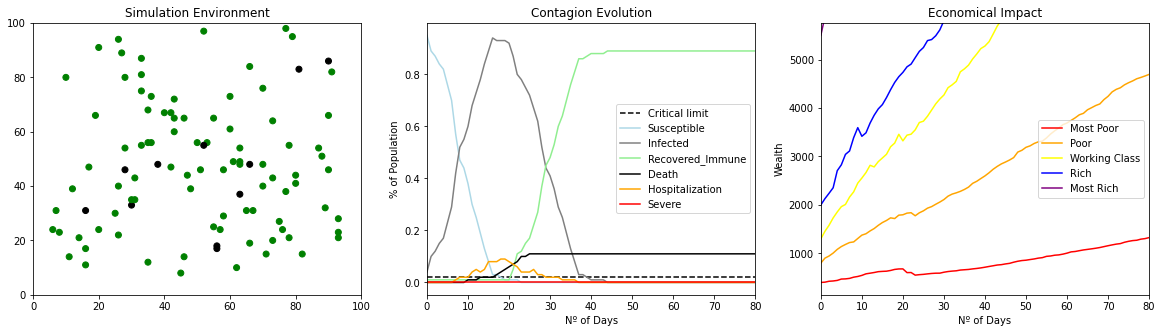

In [ ]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.04,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=100,                       
    # Height of simulation environment
    height=100,
    # Size of population
    population_size=100,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.02,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        }
)

anim = execute_simulation(sim, iterations=80)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

#save_gif(anim, 'do_nothing.gif')

In [ ]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario1.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.04,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=100,
                 # Height of simulation environment
                 height=100,
                 # Size of population
                 population_size=100,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.02,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 5
                 }
                 )

[[0, 'Susceptible', 0.86, 0.9155999999999999, 0.022374986033515183, 0.95], [0, 'Infected', 0.04, 0.07440000000000001, 0.022374986033515197, 0.13], [0, 'Recovered_Immune', 0.01, 0.01, 0.0, 0.01], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Asymptomatic', 0.99, 0.9996, 0.0019595917942265445, 1.0], [0, 'Hospitalization', 0.0, 0.0004, 0.0019595917942265427, 0.01], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 404.0443770771719, 422.53509449468515, 8.044122707682336, 439.3558131006606], [0, 'Q2', 805.1376698186443, 851.8611027311823, 24.436405300824017, 904.9985831635848], [0, 'Q3', 1323.2999986672887, 1392.5162400096212, 33.714542849382006, 1480.6803798515018], [0, 'Q4', 2051.2883782774556, 2141.974913644739, 54.37398844524801, 2306.0201701159117], [0, 'Q5', 5623.167743390006, 5848.981949812511, 137.65378800216834, 6241.79974783944], [1, 'Susceptible', 0.78, 0.8778, 0.03853777367726372, 0.95], [1, 'Infected', 0.04, 0.11220000000000001, 0.038537773677263715, 0.21], [1, 'Recovered_Immune', 0.01, 0

,Iteration,Metric,Min,Avg,Std,Max
0,0,Susceptible,0.860000,0.915600,0.022375,0.950000
1,0,Infected,0.040000,0.074400,0.022375,0.130000
2,0,Recovered_Immune,0.010000,0.010000,0.000000,0.010000
3,0,Death,0.000000,0.000000,0.000000,0.000000
4,0,Asymptomatic,0.990000,0.999600,0.001960,1.000000
...,...,...,...,...,...,...
955,79,Q1,1034.478744,1986.551757,419.870435,3405.827086
956,79,Q2,1602.557126,4160.018032,1061.693387,6295.816558
957,79,Q3,3006.032881,6638.026656,1548.323307,11146.305301
958,79,Q4,5843.890374,10053.571660,2547.581666,15408.348972


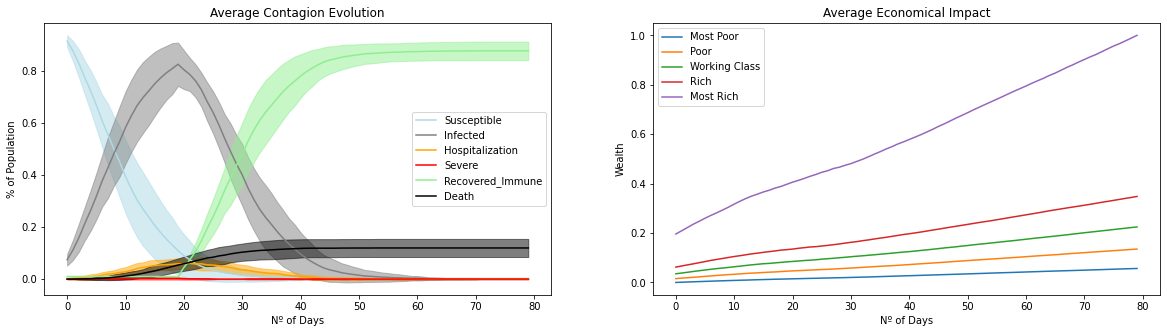

In [ ]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario1.csv')

plot_batch_results(df)

### Scenario 2 - Restrict the mobility only for infected people

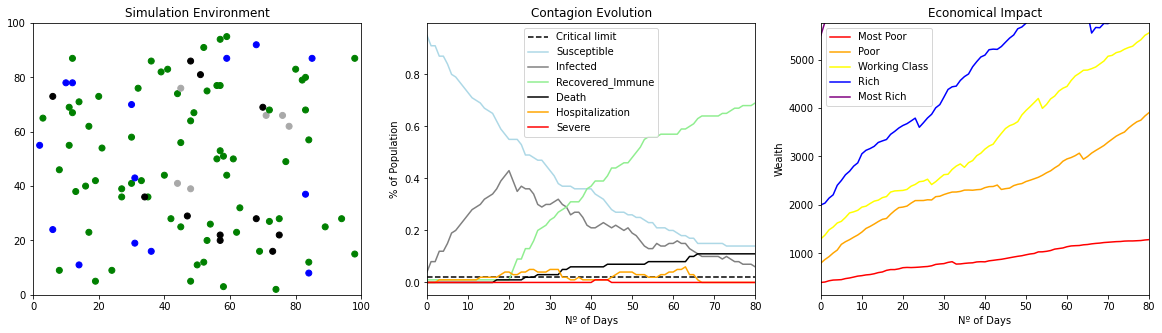

In [ ]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.04,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=100,                       
    # Height of simulation environment
    height=100,
    # Size of population
    population_size=100,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.02,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 0
        }
)

anim = execute_simulation(sim, iterations=80)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

#save_gif(anim, 'do_nothing.gif')

In [ ]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario2.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.04,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=100,
                 # Height of simulation environment
                 height=100,
                 # Size of population
                 population_size=100,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.02,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 0
                 }
                 )

[[0, 'Susceptible', 0.85, 0.9131999999999999, 0.02411970149069013, 0.95], [0, 'Infected', 0.04, 0.0768, 0.024119701490690135, 0.14], [0, 'Recovered_Immune', 0.01, 0.01, 0.0, 0.01], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Asymptomatic', 0.99, 0.9990000000000001, 0.0030000000000000027, 1.0], [0, 'Hospitalization', 0.0, 0.001, 0.0030000000000000005, 0.01], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 399.3827902957719, 421.293425290549, 10.807852783884757, 449.4206835021231], [0, 'Q2', 803.3865674677145, 845.3001814982431, 20.39931164338347, 887.5439664470045], [0, 'Q3', 1289.240219806676, 1375.3761072164875, 35.065176635162416, 1472.4967625493155], [0, 'Q4', 2002.8521314983693, 2121.4206009579393, 47.246929881320135, 2236.626432503489], [0, 'Q5', 5600.27186904892, 5853.770736013446, 142.37213716206975, 6189.770891993191], [1, 'Susceptible', 0.81, 0.89, 0.03316624790355402, 0.95], [1, 'Infected', 0.04, 0.09979999999999999, 0.03331606219228197, 0.18], [1, 'Recovered_Immune', 0.01, 0.01, 0.0

,Iteration,Metric,Min,Avg,Std,Max
0,0,Susceptible,0.850000,0.913200,0.024120,0.950000
1,0,Infected,0.040000,0.076800,0.024120,0.140000
2,0,Recovered_Immune,0.010000,0.010000,0.000000,0.010000
3,0,Death,0.000000,0.000000,0.000000,0.000000
4,0,Asymptomatic,0.990000,0.999000,0.003000,1.000000
...,...,...,...,...,...,...
955,79,Q1,1035.075790,1704.674517,354.889077,2506.518255
956,79,Q2,2467.504096,3420.456872,697.756903,5788.239943
957,79,Q3,3467.560978,5762.259575,1200.052509,8215.875979
958,79,Q4,5198.294782,8777.330491,2084.818497,12736.573327


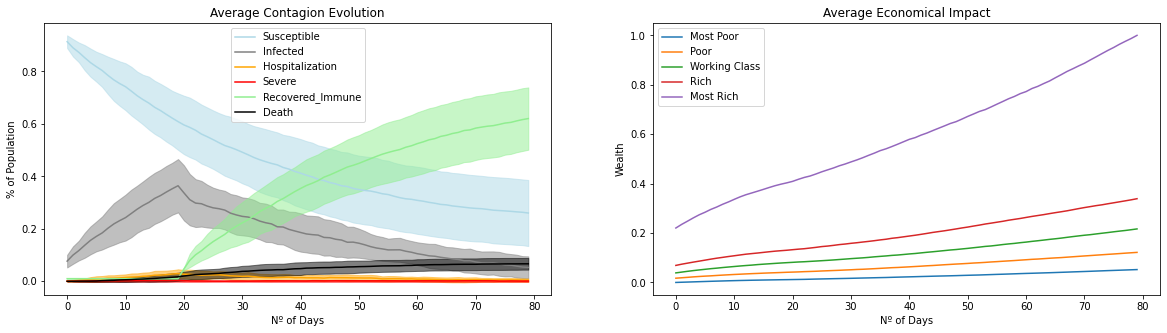

In [ ]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario2.csv')

plot_batch_results(df)

### Scenario 3 - Lockdown (restrict the mobility for everybody )

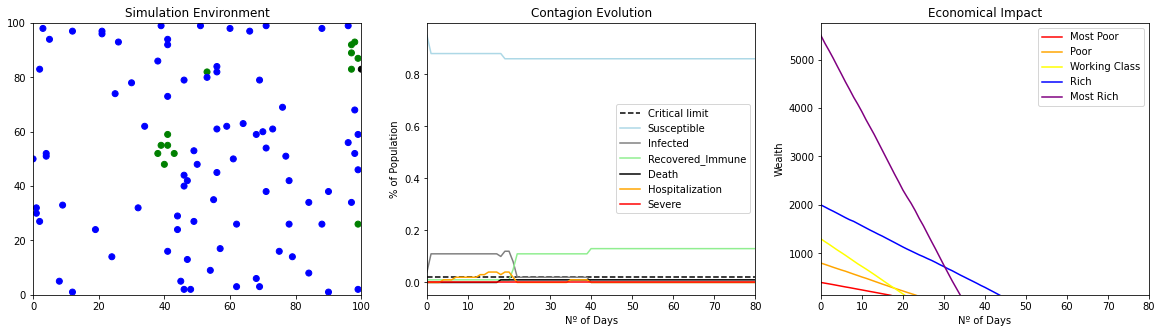

In [ ]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.04,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=100,                       
    # Height of simulation environment
    height=100,
    # Size of population
    population_size=100,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.02,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 0.5, 
        Status.Recovered_Immune : 0.5, 
        Status.Infected : 0
        }
)

anim = execute_simulation(sim, iterations=80)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

#save_gif(anim, 'do_nothing.gif')

In [ ]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario3.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.04,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=100,
                 # Height of simulation environment
                 height=100,
                 # Size of population
                 population_size=100,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.02,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 0.5,
                     Status.Recovered_Immune: 0.5,
                     Status.Infected: 0
                 }
                 )

[[0, 'Susceptible', 0.8, 0.9114, 0.030199999999999998, 0.95], [0, 'Infected', 0.04, 0.07860000000000002, 0.0302, 0.19], [0, 'Recovered_Immune', 0.01, 0.01, 0.0, 0.01], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Asymptomatic', 0.99, 0.9984000000000001, 0.0036660605559646754, 1.0], [0, 'Hospitalization', 0.0, 0.0016, 0.0036660605559646715, 0.01], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 376.0899990186257, 386.3468081579039, 3.845413769408468, 394.00000000000006], [0, 'Q2', 758.280794052662, 772.257741335655, 6.602877245431255, 786.0000000000001], [0, 'Q3', 1225.2499999999998, 1257.3975231399143, 10.55273867363901, 1277.2500000000002], [0, 'Q4', 1900.0, 1936.294556130256, 18.021860623746935, 1981.945505821981], [0, 'Q5', 5174.464563885419, 5304.014224226322, 53.77287835642042, 5430.73092849689], [1, 'Susceptible', 0.8, 0.9083999999999999, 0.030289272028228075, 0.95], [1, 'Infected', 0.04, 0.08159999999999998, 0.030289272028228082, 0.19], [1, 'Recovered_Immune', 0.01, 0.01, 0.0, 0.01], [1,

,Iteration,Metric,Min,Avg,Std,Max
0,0,Susceptible,0.800000,0.911400,0.030200,0.950000
1,0,Infected,0.040000,0.078600,0.030200,0.190000
2,0,Recovered_Immune,0.010000,0.010000,0.000000,0.010000
3,0,Death,0.000000,0.000000,0.000000,0.000000
4,0,Asymptomatic,0.990000,0.998400,0.003666,1.000000
...,...,...,...,...,...,...
955,79,Q1,-1510.133889,-694.428117,307.181907,-55.569024
956,79,Q2,-2291.062282,-1394.339251,504.834310,-261.401261
957,79,Q3,-4399.844390,-2076.539436,802.053506,-431.964298
958,79,Q4,-5654.131860,-3016.193702,1401.029389,476.979179


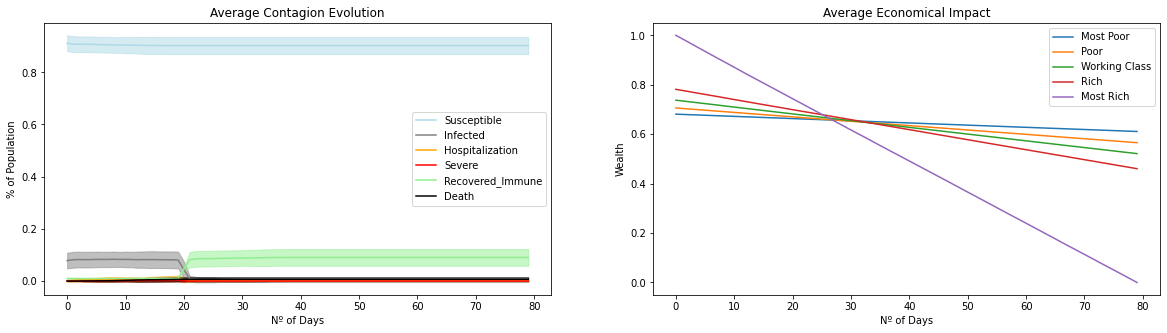

In [ ]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario3.csv')

plot_batch_results(df)

### Scenario 4 - Restrict the mobility (apply the lockdown) after 20% of the population is infected and release the restrictions when more then 60% is safe


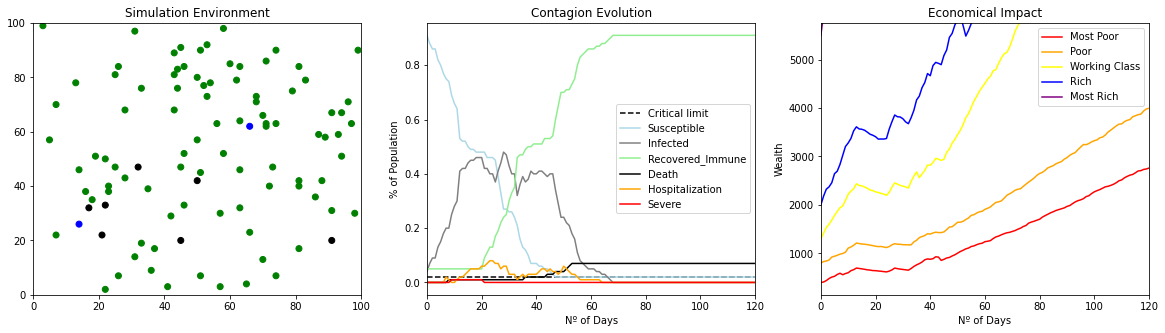

In [ ]:
sim = Simulation(
    length=100,                          
    height=100,
    initial_infected_perc = 0.04,       
    population_size=100,                     
    contagion_distance=5,                
    critical_limit=.02,
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        })

sim.append_trigger_simulation(lambda a : a.get_statistics()['Infected'] >= .2, 
                             'amplitudes', lambda a : {                       
        Status.Susceptible : 1.5, 
        Status.Recovered_Immune : 1.5, 
        Status.Infected : 1.5 
        } )

sim.append_trigger_simulation(lambda a : a.get_statistics()['Infected'] <= .40, 
                             'amplitudes', lambda a : {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        } )


anim = execute_simulation(sim, iterations=120)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim


In [ ]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 120, "scenario4.csv",
                 length=100,
                 height=100,
                 initial_infected_perc=0.04,
                 population_size=100,
                 contagion_distance=5,
                 critical_limit=.02,
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 5
                 },
                 triggers_simulation=[
                     {'condition': lambda a: a.get_statistics()['Infected'] >= .2,
                      'attribute': 'amplitudes',
                      'action': lambda a: {
                          Status.Susceptible: 1.5,
                          Status.Recovered_Immune: 1.5,
                          Status.Infected: 1.5
                      }},
                     {'condition': lambda a: a.get_statistics()['Infected'] <= .40,
                      'attribute': 'amplitudes',
                      'action': lambda a: {
                          Status.Susceptible: 5,
                          Status.Recovered_Immune: 5,
                          Status.Infected: 5
                      }}
                 ])

[[0, 'Susceptible', 0.83, 0.8792, 0.018744599222175987, 0.91], [0, 'Infected', 0.04, 0.07079999999999999, 0.01874459922217597, 0.12], [0, 'Recovered_Immune', 0.05, 0.04999999999999999, 1.3877787807814457e-17, 0.05], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Asymptomatic', 0.99, 0.9994, 0.0023748684174075855, 1.0], [0, 'Hospitalization', 0.0, 0.0006, 0.0023748684174075834, 0.01], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 404.7945110070362, 423.027935841609, 10.327075927071283, 447.76898083349477], [0, 'Q2', 811.8441170647001, 856.339305876209, 21.438234758546546, 902.68992432711], [0, 'Q3', 1320.129141724627, 1384.6386716018976, 33.144628154673846, 1485.0600523129249], [0, 'Q4', 2013.0978525715734, 2122.6578351112285, 57.37607355766789, 2241.901830316794], [0, 'Q5', 5492.803407577683, 5843.327523378023, 154.70922103853331, 6156.72941396949], [1, 'Susceptible', 0.79, 0.8462, 0.03116985723419342, 0.9], [1, 'Infected', 0.05, 0.1038, 0.031169857234193424, 0.16], [1, 'Recovered_Immune', 0.05

,Iteration,Metric,Min,Avg,Std,Max
0,0,Susceptible,0.830000,0.879200,1.874460e-02,0.910000
1,0,Infected,0.040000,0.070800,1.874460e-02,0.120000
2,0,Recovered_Immune,0.050000,0.050000,1.387779e-17,0.050000
3,0,Death,0.000000,0.000000,0.000000e+00,0.000000
4,0,Asymptomatic,0.990000,0.999400,2.374868e-03,1.000000
...,...,...,...,...,...,...
1435,119,Q1,1568.766693,2641.204602,5.919261e+02,4462.015598
1436,119,Q2,3247.653158,5041.709993,9.949434e+02,7262.134265
1437,119,Q3,3957.748688,8223.387691,1.765856e+03,11419.695200
1438,119,Q4,5816.726023,13017.583434,3.332687e+03,19396.743720


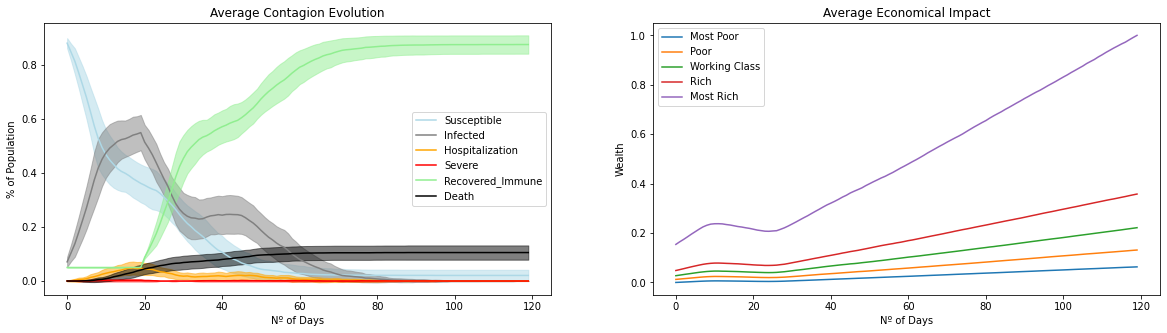

In [ ]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario4.csv')

plot_batch_results(df)